In [1]:
from feynml.feynmandiagram import FeynmanDiagram
from feynml.feynml import FeynML, Head, Meta
from feynml.leg import Leg
from feynml.momentum import Momentum
from feynml.propagator import Propagator
from feynml.vertex import Vertex

In [2]:
v1 = Vertex()
v2 = Vertex()

fd = FeynmanDiagram().add(
    v1,v2,
    Propagator(pdgid=21).connect(v1,v2),
    Leg(pdgid=1).with_target(v1).with_incoming().with_momentum(Momentum(name="p_a")).with_color('red'),
    Leg(pdgid=-1).with_target(v1).with_incoming().with_momentum(Momentum(name="p_b")),
    Leg(pdgid=2).with_target(v2).with_outgoing().with_momentum(Momentum(name="k_a")),
    Leg(pdgid=-2).with_target(v2).with_outgoing().with_momentum(Momentum(name="k_b")),
    
)


In [3]:
from feynamp.momentum import *
set_missing_momenta(fd)
print(fd.propagators[0].momentum)

Momentum(name='+p_a+p_b', px=None, py=None, pz=None, e=None)


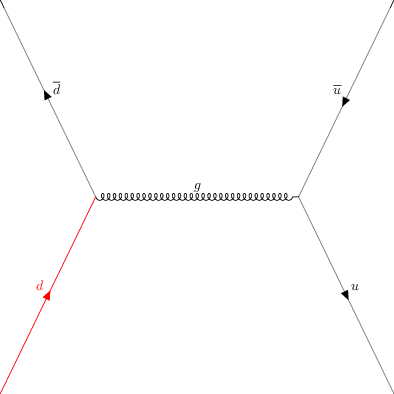

In [4]:
fd

In [5]:
from feynmodel.interface.ufo import load_ufo_model
fm = load_ufo_model("ufo_sm")

In [6]:
fm.vertices[0].particles[0].pdg_code

250

In [7]:
fd.get_connections(v1)

[Propagator(id='Propagator11', pdgid=21, name='g', type='gluon', particle=<Particle: name="g", pdgid=21, mass=0.0 MeV>, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, label=None, momentum=Momentum(name='+p_a+p_b', px=None, py=None, pz=None, e=None), source='Vertex8', target='Vertex9'),
 Leg(id='Leg12', pdgid=1, name='d', type='fermion', particle=<Particle: name="d", pdgid=1, mass=4.67 + 0.50 - 0.20 MeV>, style=cssutils.css.CSSStyleDeclaration(cssText='color: red'), clazz=None, label=None, momentum=Momentum(name='p_a', px=None, py=None, pz=None, e=None), target='Vertex8', x=None, y=None, z=None, sense='incoming', external=None),
 Leg(id='Leg13', pdgid=-1, name='d~', type='anti fermion', particle=<Particle: name="d~", pdgid=-1, mass=4.67 + 0.50 - 0.20 MeV>, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, label=None, momentum=Momentum(name='p_b', px=None, py=None, pz=None, e=None), target='Vertex8', x=None, y=None, z=None, sense='incoming', external=None)]

In [8]:
import feynamp as fp

In [9]:
vv2 = fp.find_vertex_in_model(fd,v2,fm)

In [10]:
vv1 = fp.find_vertex_in_model(fd,v1,fm)

In [11]:
vv1.color

['T(3,2,1)']

In [12]:
vv1.couplings

{(0, 0): GC_11}

In [13]:
vv1.particles[0].color

-3

In [14]:
fp.get_vertex_math(fd,v1,fm)

[('complex(0,1)*G',
  'T(GluOutPropagator11,ColLeg13,ColLeg12)',
  'Gamma(MuOutPropagator11,SpinLeg13,SpinLeg12)')]

In [15]:
fp.get_vertex_math(fd,v2,fm)

[('complex(0,1)*G',
  'T(GluInPropagator11,ColLeg14,ColLeg15)',
  'Gamma(MuInPropagator11,SpinLeg14,SpinLeg15)')]

In [16]:
cfd = fd.conjugated()

In [17]:

fp.get_vertex_math(cfd,cfd.vertices[0],fm)

[('complex(0,1)*G',
  'T(GluInPropagator26,ColLeg22,ColLeg23)',
  'Gamma(MuInPropagator26,SpinLeg22,SpinLeg23)')]

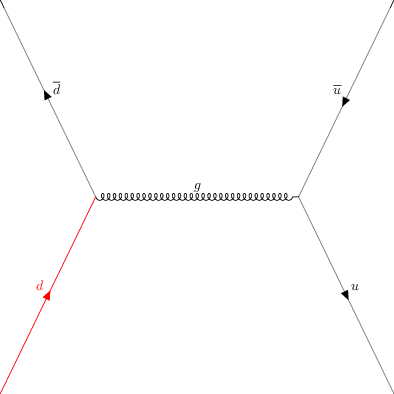

In [18]:
fd

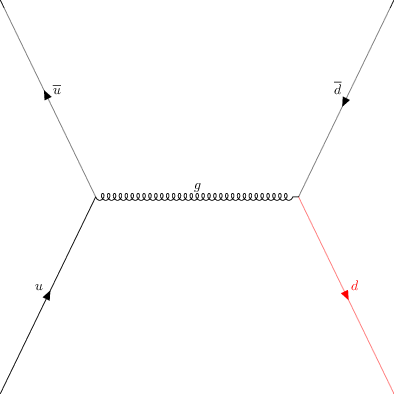

In [19]:
cfd

In [20]:
fp.get_propagator_math(fd,fd.propagators[0],fm)

'da(GluInPropagator11,GluOutPropagator11)*Metric(MuInPropagator11,MuOutPropagator11)*Denom(+Mom_p_a+Mom_p_b,0)'

In [21]:
a=fp.feynman_diagram_to_string(fd,fm)
a

'complex(0,1)*G*T(GluOutPropagator11,ColLeg13,ColLeg12)*Gamma(MuOutPropagator11,SpinLeg13,SpinLeg12) * complex(0,1)*G*T(GluInPropagator11,ColLeg14,ColLeg15)*Gamma(MuInPropagator11,SpinLeg14,SpinLeg15) * VC(ColLeg12,Mom_p_a)*u(SpinLeg12,Mom_p_a) * VC(ColLeg13,Mom_p_b)*v(SpinLeg13,Mom_p_b) * VC(ColLeg14,Mom_k_a)*u_bar(SpinLeg14,Mom_k_a) * VC(ColLeg15,Mom_k_b)*v_bar(SpinLeg15,Mom_k_b) * da(GluInPropagator11,GluOutPropagator11)*Metric(MuInPropagator11,MuOutPropagator11)*Denom(+Mom_p_a+Mom_p_b,0)'

In [22]:
b=fp.feynman_diagram_to_string(cfd,fm)
b

'complex(0,1)*G*T(GluInPropagator26,ColLeg22,ColLeg23)*Gamma(MuInPropagator26,SpinLeg22,SpinLeg23) * complex(0,1)*G*T(GluOutPropagator26,ColLeg25,ColLeg24)*Gamma(MuOutPropagator26,SpinLeg25,SpinLeg24) * VC(ColLeg22,Mom_p_a)*u_bar(SpinLeg22,Mom_p_a) * VC(ColLeg23,Mom_p_b)*v_bar(SpinLeg23,Mom_p_b) * VC(ColLeg24,Mom_k_a)*u(SpinLeg24,Mom_k_a) * VC(ColLeg25,Mom_k_b)*v(SpinLeg25,Mom_k_b) * da(GluInPropagator26,GluOutPropagator26)*Metric(MuInPropagator26,MuOutPropagator26)*Denom(+Mom_p_a+Mom_p_b,0)'

In [23]:
from feynamp.form.color import *

In [24]:
cb= apply_color(b)
cb

'1/2*Metric(MuInPropagator26,MuOutPropagator26)*df(ColLeg22,ColLeg25)*df(ColLeg23,ColLeg24)*Denom(Mom_p_a+Mom_p_b,0)*Gamma(MuInPropagator26,SpinLeg22,SpinLeg23)*Gamma(MuOutPropagator26,SpinLeg25,SpinLeg24)*u(SpinLeg24,Mom_k_a)*v(SpinLeg25,Mom_k_b)*ubar(SpinLeg22,Mom_p_a)*vbar(SpinLeg23,Mom_p_b)*VC(ColLeg22,Mom_p_a)*VC(ColLeg23,Mom_p_b)*VC(ColLeg25,Mom_k_b)*VC(ColLeg24,Mom_k_a)*G^2*Nc^-1-1/2*Metric(MuInPropagator26,MuOutPropagator26)*df(ColLeg22,ColLeg24)*df(ColLeg23,ColLeg25)*Denom(Mom_p_a+Mom_p_b,0)*Gamma(MuInPropagator26,SpinLeg22,SpinLeg23)*Gamma(MuOutPropagator26,SpinLeg25,SpinLeg24)*u(SpinLeg24,Mom_k_a)*v(SpinLeg25,Mom_k_b)*ubar(SpinLeg22,Mom_p_a)*vbar(SpinLeg23,Mom_p_b)*VC(ColLeg22,Mom_p_a)*VC(ColLeg23,Mom_p_b)*VC(ColLeg25,Mom_k_b)*VC(ColLeg24,Mom_k_a)*G^2'

In [25]:
ca = apply_color(a)
ca

'1/2*Metric(MuOutPropagator11,MuInPropagator11)*df(ColLeg13,ColLeg14)*df(ColLeg12,ColLeg15)*Denom(Mom_p_a+Mom_p_b,0)*Gamma(MuOutPropagator11,SpinLeg13,SpinLeg12)*Gamma(MuInPropagator11,SpinLeg14,SpinLeg15)*u(SpinLeg12,Mom_p_a)*v(SpinLeg13,Mom_p_b)*ubar(SpinLeg14,Mom_k_a)*vbar(SpinLeg15,Mom_k_b)*VC(ColLeg13,Mom_p_b)*VC(ColLeg12,Mom_p_a)*VC(ColLeg14,Mom_k_a)*VC(ColLeg15,Mom_k_b)*G^2*Nc^-1-1/2*Metric(MuOutPropagator11,MuInPropagator11)*df(ColLeg13,ColLeg15)*df(ColLeg12,ColLeg14)*Denom(Mom_p_a+Mom_p_b,0)*Gamma(MuOutPropagator11,SpinLeg13,SpinLeg12)*Gamma(MuInPropagator11,SpinLeg14,SpinLeg15)*u(SpinLeg12,Mom_p_a)*v(SpinLeg13,Mom_p_b)*ubar(SpinLeg14,Mom_k_a)*vbar(SpinLeg15,Mom_k_b)*VC(ColLeg13,Mom_p_b)*VC(ColLeg12,Mom_p_a)*VC(ColLeg14,Mom_k_a)*VC(ColLeg15,Mom_k_b)*G^2'

In [26]:
m2c = apply_color(f"({ca})*({cb})")
m2c

'1/2*Metric(MuOutPropagator11,MuInPropagator11)*Metric(MuInPropagator26,MuOutPropagator26)*Denom(Mom_p_a+Mom_p_b,0)^2*Gamma(MuOutPropagator11,SpinLeg13,SpinLeg12)*Gamma(MuInPropagator11,SpinLeg14,SpinLeg15)*Gamma(MuInPropagator26,SpinLeg22,SpinLeg23)*Gamma(MuOutPropagator26,SpinLeg25,SpinLeg24)*u(SpinLeg12,Mom_p_a)*u(SpinLeg24,Mom_k_a)*v(SpinLeg13,Mom_p_b)*v(SpinLeg25,Mom_k_b)*ubar(SpinLeg14,Mom_k_a)*ubar(SpinLeg22,Mom_p_a)*vbar(SpinLeg15,Mom_k_b)*vbar(SpinLeg23,Mom_p_b)*G^4*Nc*Cf'

In [27]:
from feynamp.form.lorentz import *
m2cd= apply_gammas(m2c)
m2cd

'8*P(MuInPropagator11,Mom_p_a)*P(MuInPropagator11,Mom_k_a)*P(MuOutPropagator26,Mom_p_b)*P(MuOutPropagator26,Mom_k_b)*Denom(Mom_p_a+Mom_p_b,0)^2*G^4*Nc*Cf+8*P(MuInPropagator11,Mom_p_a)*P(MuInPropagator11,Mom_k_b)*P(MuOutPropagator26,Mom_p_b)*P(MuOutPropagator26,Mom_k_a)*Denom(Mom_p_a+Mom_p_b,0)^2*G^4*Nc*Cf+8*P(MuInPropagator11,Mom_p_b)*P(MuInPropagator11,Mom_k_a)*P(MuOutPropagator26,Mom_p_a)*P(MuOutPropagator26,Mom_k_b)*Denom(Mom_p_a+Mom_p_b,0)^2*G^4*Nc*Cf+8*P(MuInPropagator11,Mom_p_b)*P(MuInPropagator11,Mom_k_b)*P(MuOutPropagator26,Mom_p_a)*P(MuOutPropagator26,Mom_k_a)*Denom(Mom_p_a+Mom_p_b,0)^2*G^4*Nc*Cf-16*P(MuOutPropagator26,Mom_p_a)*P(MuOutPropagator26,Mom_p_b)*P(N1_?,Mom_k_a)^2*P(N2_?,Mom_k_b)^2*Denom(Mom_p_a+Mom_p_b,0)^2*G^4*Nc*Cf-16*P(MuOutPropagator26,Mom_p_a)*P(MuOutPropagator26,Mom_p_b)*P(N1_?,Mom_k_a)*P(N1_?,Mom_k_b)*Denom(Mom_p_a+Mom_p_b,0)^2*G^4*Nc*Cf-16*P(MuOutPropagator26,Mom_k_a)*P(MuOutPropagator26,Mom_k_b)*P(N1_?,Mom_p_a)^2*P(N2_?,Mom_p_b)^2*Denom(Mom_p_a+Mom_p_b,0)^2

In [28]:
import feynamp.form.momentum as m
import importlib
importlib.reload(m)
m2cdm = m.apply_momenta(m2cd)
print(m2cdm)
print()
m2cdmd = m.apply_denominators(m2cdm)
print(m2cdmd)

32*Denom(Mom_p_a+Mom_p_b,0)^2*Mom_p_a.Mom_p_a*Mom_k_a.Mom_k_a*Mom_p_b.Mom_p_b*Mom_k_b.Mom_k_b*G^4*Nc*Cf+16*Denom(Mom_p_a+Mom_p_b,0)^2*Mom_p_a.Mom_p_a*Mom_k_a.Mom_k_b*Mom_p_b.Mom_p_b*G^4*Nc*Cf+16*Denom(Mom_p_a+Mom_p_b,0)^2*Mom_p_a.Mom_k_a*Mom_p_b.Mom_k_b*G^4*Nc*Cf+16*Denom(Mom_p_a+Mom_p_b,0)^2*Mom_p_a.Mom_p_b*Mom_k_a.Mom_k_a*Mom_k_b.Mom_k_b*G^4*Nc*Cf+16*Denom(Mom_p_a+Mom_p_b,0)^2*Mom_p_a.Mom_k_b*Mom_k_a.Mom_p_b*G^4*Nc*Cf

32*Den(Mom_p_a.Mom_p_a+2*Mom_p_a.Mom_p_b+Mom_p_b.Mom_p_b)^2*Mom_p_a.Mom_p_a*Mom_p_b.Mom_p_b*Mom_k_a.Mom_k_a*Mom_k_b.Mom_k_b*G^4*Nc*Cf+16*Den(Mom_p_a.Mom_p_a+2*Mom_p_a.Mom_p_b+Mom_p_b.Mom_p_b)^2*Mom_p_a.Mom_p_a*Mom_p_b.Mom_p_b*Mom_k_a.Mom_k_b*G^4*Nc*Cf+16*Den(Mom_p_a.Mom_p_a+2*Mom_p_a.Mom_p_b+Mom_p_b.Mom_p_b)^2*Mom_p_a.Mom_p_b*Mom_k_a.Mom_k_a*Mom_k_b.Mom_k_b*G^4*Nc*Cf+16*Den(Mom_p_a.Mom_p_a+2*Mom_p_a.Mom_p_b+Mom_p_b.Mom_p_b)^2*Mom_p_a.Mom_k_a*Mom_p_b.Mom_k_b*G^4*Nc*Cf+16*Den(Mom_p_a.Mom_p_a+2*Mom_p_a.Mom_p_b+Mom_p_b.Mom_p_b)^2*Mom_p_a.Mom_k_b*Mom_p_b.Mom_k_a*G^4*Nc*Cf


In [29]:
import feynamp.form.momentum as m
import importlib
importlib.reload(m)
r= m.apply_onshell(m2cdmd,fd,fm)
r

'16*Den(Mom_p_a.Mom_p_a+2*Mom_p_a.Mom_p_b+Mom_p_b.Mom_p_b)^2*Mom_p_a.Mom_k_a*Mom_p_b.Mom_k_b*G^4*Nc*Cf+16*Den(Mom_p_a.Mom_p_a+2*Mom_p_a.Mom_p_b+Mom_p_b.Mom_p_b)^2*Mom_p_a.Mom_k_b*Mom_p_b.Mom_k_a*G^4*Nc*Cf'

In [30]:
import feynamp.form.momentum as m
import importlib
importlib.reload(m)
rr= m.apply_mandelstamm_2_to_2(r,fd,fm)
rr

'4*Den(Mom_p_a.Mom_p_a+2*Mom_p_a.Mom_p_b+Mom_p_b.Mom_p_b)^2*G^4*Nc*Cf*msu^2+4*Den(Mom_p_a.Mom_p_a+2*Mom_p_a.Mom_p_b+Mom_p_b.Mom_p_b)^2*G^4*Nc*Cf*mst^2'

In [31]:
import feynamp.form.momentum as m
from  feynamp.form.momentum import * 
import importlib
importlib.reload(m)
rrr= m.apply_den(rr,get_onshell(fd,fm) + get_mandelstamm_2_to_2(fd,fm,replace_u=True))
rrr

'4*1/(mss)^2*G^4*Nc*Cf*msu^2+4*1/(mss)^2*G^4*Nc*Cf*mst^2'

In [32]:
from sympy.parsing.sympy_parser import parse_expr
from sympy import *
ret =simplify(parse_expr(rrr.replace("Mom_","").replace(".","_").replace("^","**")
                    .replace("mss","s")
                   .replace("msu","u")
                   .replace("mst","t")))

In [33]:
ret = simplify(ret.subs("Nc","3").subs("Cf","4/3"))/2/2/3/3 # average spins and colors
ret

4*G**4*(t**2 + u**2)/(9*s**2)

In [34]:
# Ellis stirling and weber QCD and collider physics Tab 7.1
# https://feyncalc.github.io/FeynCalcExamplesMD/QCD/Tree/QiQibar-QjQjbar
from sympy.parsing.sympy_parser import parse_expr
from sympy import *
expected = simplify(parse_expr("4*G**4*(t**2+u**2)/(9 *s**2)"))#.subs("s","t+u")
expected

4*G**4*(t**2 + u**2)/(9*s**2)

In [35]:
# comapre
ret.equals(expected)

True